In [ ]:
#@title Mouting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
import zipfile


zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Anomaly/archive.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/Anomaly")
zip_ref.close()

#Kmeans

#KMeans Preproccessing Data

In [ ]:
#@title Preprocessing of data
data = pd.read_csv('/content/drive/MyDrive/Anomaly/kddcup.data_10_percent/kddcup.data_10_percent', header= None)
data

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal.
494017,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal.
494018,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal.
494019,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal.


In [ ]:
data.describe()

,0,4,5,6,7,8,9,10,11,12,...,31,32,33,34,35,36,37,38,39,40
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       494021 non-null  int64  
 1   1       494021 non-null  object 
 2   2       494021 non-null  object 
 3   3       494021 non-null  object 
 4   4       494021 non-null  int64  
 5   5       494021 non-null  int64  
 6   6       494021 non-null  int64  
 7   7       494021 non-null  int64  
 8   8       494021 non-null  int64  
 9   9       494021 non-null  int64  
 10  10      494021 non-null  int64  
 11  11      494021 non-null  int64  
 12  12      494021 non-null  int64  
 13  13      494021 non-null  int64  
 14  14      494021 non-null  int64  
 15  15      494021 non-null  int64  
 16  16      494021 non-null  int64  
 17  17      494021 non-null  int64  
 18  18      494021 non-null  int64  
 19  19      494021 non-null  int64  
 20  20      494021 non-null  int64  
 21  21      49

In [ ]:
data.nunique()

0      2495
1         3
2        66
3        11
4      3300
5     10725
6         2
7         3
8         4
9        22
10        6
11        2
12       23
13        2
14        3
15       20
16       18
17        3
18        7
19        1
20        1
21        2
22      490
23      470
24       92
25       51
26       77
27       51
28       99
29       78
30       64
31      256
32      256
33      101
34      101
35      101
36       65
37      100
38       72
39      101
40      101
41       23
dtype: int64

In [ ]:
#@title Drop Columns With only one unique value
data.drop([19,20], axis=1, inplace= True)

In [ ]:
#@title Drop Duplicates Records
data.drop_duplicates(keep='first', inplace= True)

<ipython-input-23-94b48b57423a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="YlGnBu",annot=True)


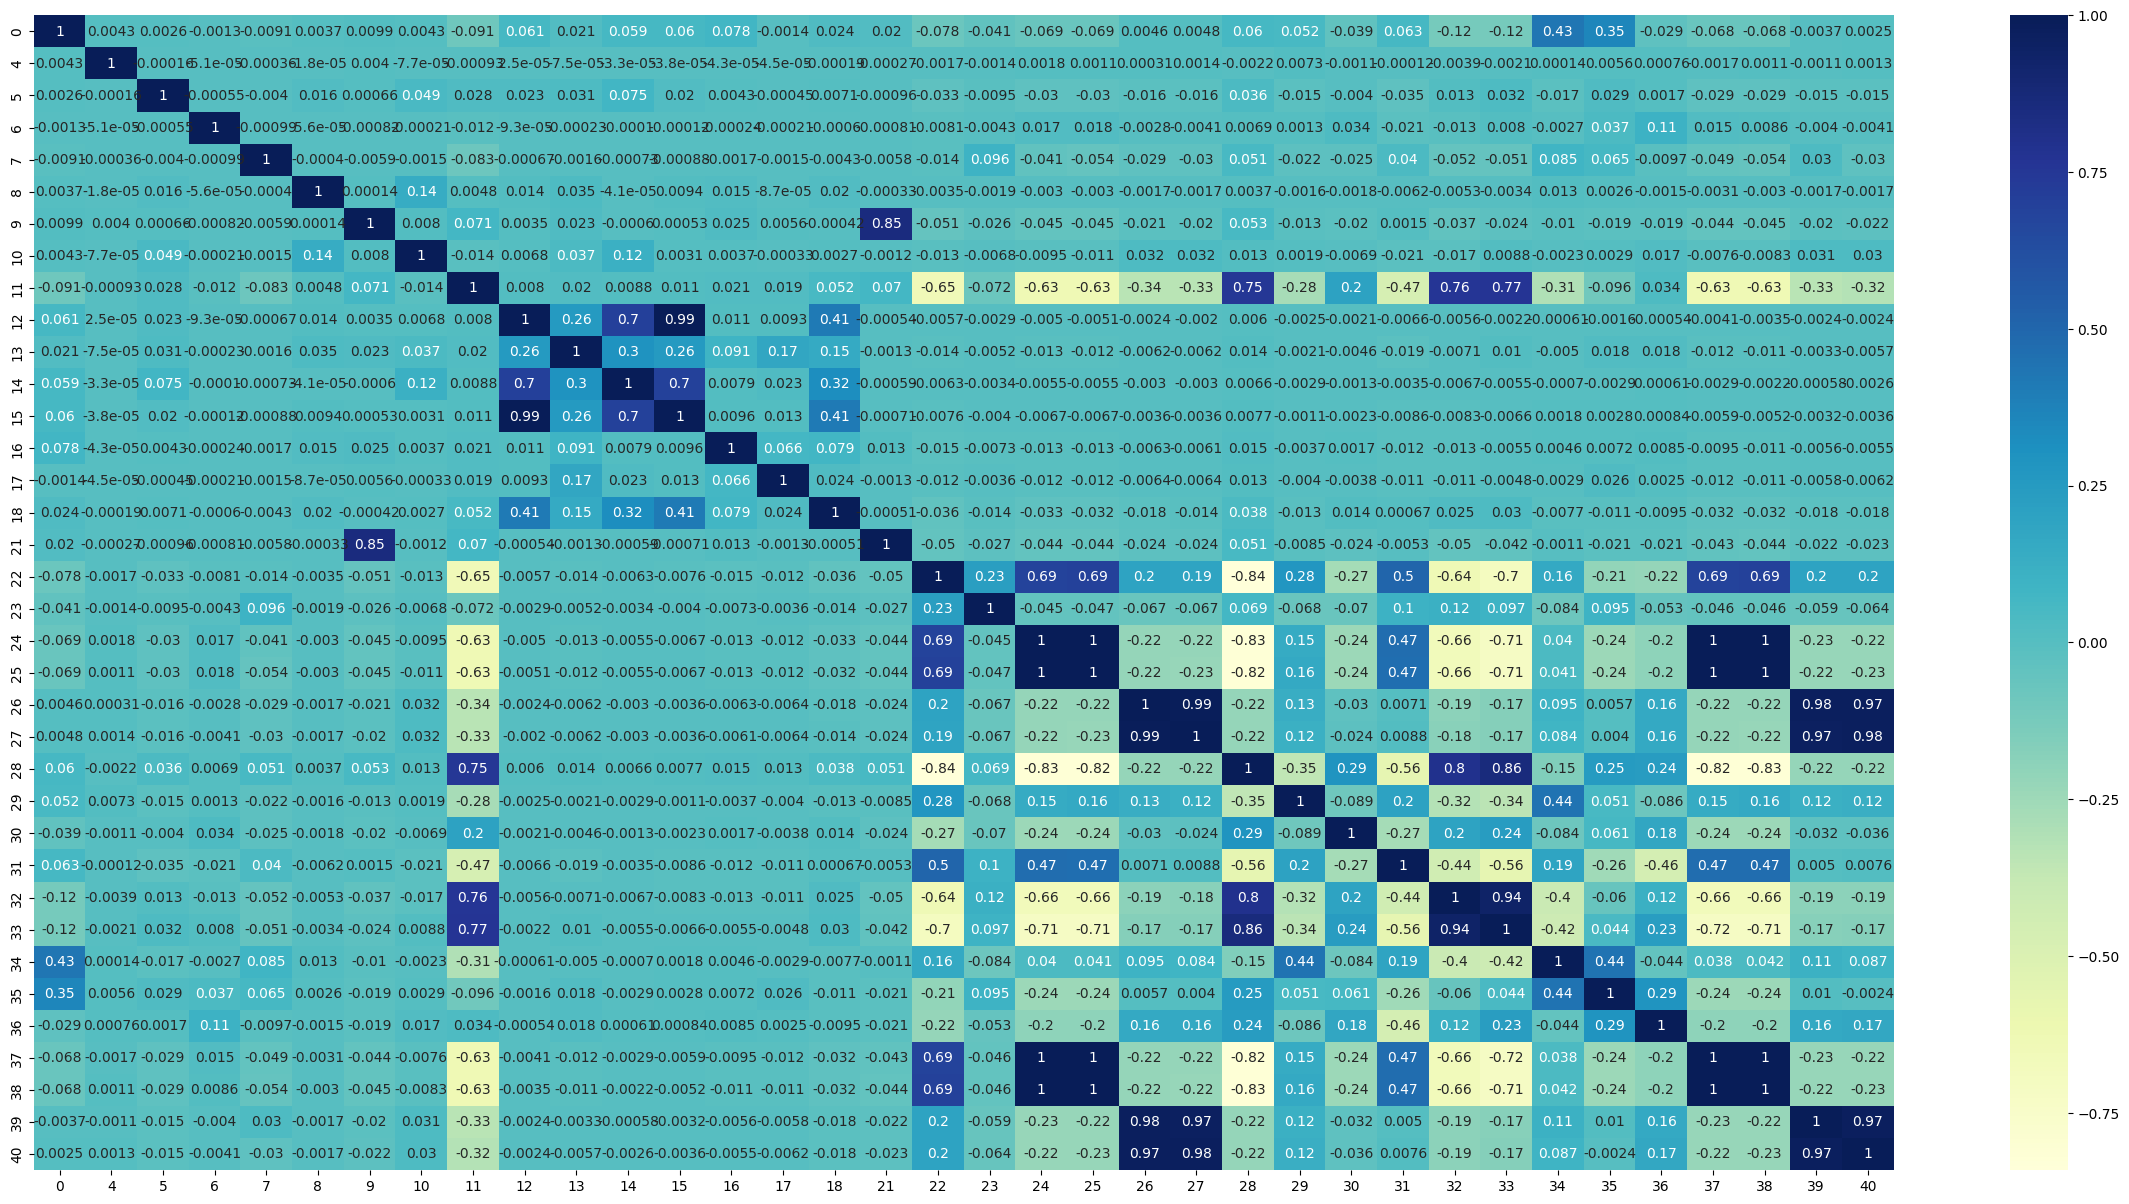

In [ ]:
plt.figure(figsize=(30,15))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu",annot=True)

In [ ]:
#@title Drop Columns with High correlation with each other
data.drop([12,24,25,26,27,37,39],axis=1,inplace=True)

In [ ]:
#@title Generate New column depending on column 41--> Attack type and the new column is called target to generalize the classifcation
attacks_types = {
'normal.': 'normal',
'back.': 'dos',
'buffer_overflow.': 'u2r',
'ftp_write.': 'r2l',
'guess_passwd.': 'r2l',
'imap.': 'r2l',
'ipsweep.': 'probe',
'land.': 'dos',
'loadmodule.': 'u2r',
'multihop.': 'r2l',
'neptune.': 'dos',
'nmap.': 'probe',
'perl.': 'u2r',
'phf.': 'r2l',
'pod.': 'dos',
'portsweep.': 'probe',
'rootkit.': 'u2r',
'satan.': 'probe',
'smurf.': 'dos',
'spy.': 'r2l',
'teardrop.': 'dos',
'warezclient.': 'r2l',
'warezmaster.': 'r2l',
'snmpgetattack.':'r2l',
'named':'r2l',
'xlock.':'r2l',
'saint.':'probe',
'apache2.':'dos',
'sendmail.':'r2l',
'udpstorm.':'dos',
'xterm.':'u2r',
'mscan.':'probe',
'processtable.':'dos',
 'ps.':'u2r',
 'httptunnel.':'r2l',
 'worm.':'u2r',
 'mailbomb.':'dos',
 'sqlattack.':'u2r',
 'snmpguess.':'u2r',
 'xsnoop.':'r2l'

}



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns


#Apply Standard Scaler for numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])



In [ ]:
#@title Studying Outliers

z_scores = data[numerical_features].apply(lambda x: (x - x.mean()) / x.std())

# Find rows where any Z-score is greater than 3 or less than -3
outliers = data[numerical_features][(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]


#Score
print(f'Number of Points :{len(data[0])}')
print(f'Number of outliers: {len(outliers[0])}')


indices=outliers.index
indices=list(indices)
data = data.drop(indices)

# data

Number of Points :145586
Number of outliers: 22063


In [ ]:
#@title Converting every categorical value to numerical one
label_encoder = preprocessing.LabelEncoder()
data[1]= label_encoder.fit_transform(data[1])
data[2]= label_encoder.fit_transform(data[2])
data[3]= label_encoder.fit_transform(data[3])


data['target'] = data[41].map(attacks_types)

y_train5=data['target']

y_train=data[41]
data.drop(['target'], axis= 1, inplace =True )
data.drop([41], axis= 1, inplace =True )

# K Means Implementation

In [ ]:
#@title Initialize Random Centroids
def kMeans_init_centroids(X, K):
  #X is Data ,K is number of clusters

    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])

    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

In [ ]:
#@title Find Closet Centroids for every point
from scipy.spatial.distance import cdist

def find_closest_centroids(X, centroids):
  distances = cdist(X, centroids)
  closest_centroid=np.argmin(distances, axis=1)
  return closest_centroid

In [ ]:
#@title Update Centroids
def compute_centroids(X, idx, K):
  # X is Data, idx is labels of clustering or the cluster to which point exist ,K is number of clusters
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids = np.zeros((K, n))
    
    for i in range(K):
        data_in_centroid = np.where(idx == i)
        centroids[i] += np.average(X[data_in_centroid], axis=0)
        
    return centroids

In [ ]:
#@title Run Kmeans 
from collections import Counter
from sklearn.metrics import silhouette_score

def run_kMeans(X, initial_centroids, max_iters=1000):  
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    previous_idx=np.zeros(m)
    i=0
    flag=False

    while (i<max_iters and flag==False):        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)

        if np.array_equal(idx, previous_idx):
          flag=True
        previous_idx=idx
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
        i=i+1
    return centroids, idx,i

# Train Model

In [ ]:
#Change Dataframe to numpy
data_numpy = data.to_numpy()
np.set_printoptions(formatter={'float_kind':'{:1f}'.format})

k=[7,15,23,31,45]
#Centroids,labels,iteration-> Contains nested list each list for value in k "for example 7"
Centroids=[]
labels=[]
iterations=[]
for c in k:
  print(f'{c} Clusters Trained')
  Centroids_1_cluster=[]
  labels_1_cluster=[]
  iterations_1_cluster=[]
  for j in range(10):
  #Initialize Random Centroids
    initial_centroids = kMeans_init_centroids(data_numpy, c)
    #Closed Centroid for every point
    Cent,label,iter = run_kMeans(data_numpy, initial_centroids)
    Centroids_1_cluster.append(Cent)
    labels_1_cluster.append(label)
    iterations_1_cluster.append(iter)
    print(f'Number of iterations is {iter}')
  Centroids.append(Centroids_1_cluster)
  labels.append(labels_1_cluster)
  iterations.append(iterations_1_cluster)



7 Clusters Trained
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Number of iterations is 15
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndar

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.nd

KeyboardInterrupt: ignored

# Mapping for 23 Clusters

In [ ]:
#@title Map cluster results to use implemented evaluation metrics
def map_cluster_to_labels(clustering_labels,y,k):
  if k>23:
    matrix=np.zeros([k,k])
  else:
    matrix=np.zeros([23,23])

  map={'normal.':1,'buffer_overflow.':2,'loadmodule.':3,'perl.':4,'neptune.':5,'smurf.':6,'guess_passwd.':7,
        'pod.':8, 'teardrop.':9, 'portsweep.':10,
        'ipsweep.':11, 'land.':12, 'ftp_write.':13, 'back.':14, 'imap.':15, 'satan.':16,
        'phf.':17, 'nmap.':18, 'multihop.':19, 'warezmaster.':20, 'warezclient.':21,
        'spy.':22, 'rootkit.':23
      }
  df = pd.DataFrame({'y_predicted': clustering_labels, 'y_train': y})
  for i in range(len(np.unique(clustering_labels))):
    temp=df[df['y_predicted']==np.unique(clustering_labels)[i]]
    count=temp.value_counts()
    for key, value in count.items():
      if key [1] not in map:
        matrix[i][np.argmax(matrix[i])]+=value
      else:
        matrix[i][map[key[1]]-1]=value
  return matrix



In [ ]:
#@title Map cluster results to use built in evaluation metrics
def rename_clusters(matrix,clustering_labels):
  names={1:'normal.',2:'buffer_overflow.',3:'loadmodule.',4:'perl.',5:'neptune.',6:'smurf.',7:'guess_passwd.',
        8:'pod.', 9:'teardrop.', 10:'portsweep.',
        11:'ipsweep.', 12:'land.', 13:'ftp_write.', 14:'back.', 15:'imap.', 16:'satan.',
        17:'phf.', 18:'nmap.', 19:'multihop.', 20:'warezmaster.', 21:'warezclient.',
        22:'spy.', 23:'rootkit.'
      }

  #Get Most Ocurrence label in each cluster
  max_indices = np.argmax(matrix, axis=1)
  max_indices=max_indices+1

  #labels23 --> list of size 23 holding the label most appeard in every cluster
  labels23=[]
  for i in range(len(max_indices)):
    value=names.get(max_indices[i])
    labels23.append(value)
  labels23 = {index: value for index, value in enumerate(labels23)}



  #Replace every cluster number with the most appeard label in this cluster

  temp = np.copy(clustering_labels)
  temp = temp.tolist()

  for i in range(len(temp)):
    temp[i]=labels23.get(clustering_labels[i])

  return temp

#Evalute using precision ,recall,f1 score

In [ ]:
#@title Implement Evaluation metrics


import math

def measure_precision(matrix):
  res =0
  for i in range (matrix.shape[0]):
      if np.sum(matrix[i]) == 0:
        res =res
      else:
        res = res + (np.sum(matrix[i])/np.sum(matrix)*(np.max(matrix[i]/(np.sum(matrix[i])))))
  return res/matrix.shape[0]

def measure_recall(matrix):
  total_rec =0
  for i in range (matrix.shape[0]):

      max_index = np.where(matrix[i] ==np.max(matrix[i]))
      max_sum = np.sum(matrix[:,max_index],axis=0)
      if (max_sum==0).any():
        rec=0
      else:
        rec = (np.max(matrix[i]/max_sum))
      total_rec =total_rec +rec
  return total_rec/matrix.shape[0]


def measure_Fscore(matrix):
  Fi =0
  for i in range (matrix.shape[0]):
      if np.sum(matrix[i]) == 0:
        per =0 
      else:  
        per = (np.max(matrix)/np.sum(matrix[i]))
      max_index = np.where(matrix[i] ==np.max(matrix[i]))
      max_sum = np.sum(matrix[:,max_index],axis=0)
      if (max_sum==0).any():
        rec=0
      else:
        rec = (np.max(matrix[i]/max_sum))
      if per & rec ==0:
        continue
      Fi = Fi+ (2*per*rec/per+rec)
  return Fi/matrix.shape[0]


def cond_Entropy(matrix):
  Et =0
  for i in range (matrix.shape[0]):
    E_i =0
    cluster_count = np.sum(matrix[i])
    for k in range (matrix.shape[1]):
      if cluster_count ==0 or matrix[i][k] ==0:
        E = 0
      else:
        x = (matrix[i][k]/cluster_count)
        E = -x * math.log(x) 
     
      E_i = E_i + E  
    Et = Et + (np.sum(matrix[i]) / np.sum(matrix))*E_i
  return Et

In [ ]:
#@title Evluate Train Data Using Implemented Functions
counter=0

for c in k:
  print(f"**********Training  {c} Centroids**********")
  for i in range(len(iterations[counter])):
    print("Centroid "+str(i)+" Having "+str(iterations[counter][i])+" iterations")
    matrix=map_cluster_to_labels(labels[counter][i],y_train,c)

    precision = measure_precision(matrix)
    print("Precision: {:.3f}".format(precision*100))

    recall = measure_recall(matrix)
    print("Recall: {:.3f}".format(recall*100))


    # f1score = measure_Fscore(matrix)
    # print("F1-score: {:.3f}".format(f1score))
    entropy = cond_Entropy(matrix)
    print("entropy: {:.3f}".format(entropy*100))
  print("********************************************************************")
  counter=counter+1

In [ ]:
#@title Evluate Train Data Using Built In Functions
from sklearn.metrics import precision_score, recall_score, f1_score
counter=0

for c in k:
  print(f"**********Training  {c} Centroids**********")
  for i in range(len(iterations[counter])):
    print("Centroid "+str(i)+" Having "+str(iterations[counter][i])+" iterations")
    matrix=map_cluster_to_labels(labels[counter][i],y_train,c)
    temp=rename_clusters(matrix,labels[counter][i])
    
    precision = precision_score(y_train, temp, average='weighted',zero_division=1)
    recall = recall_score(y_train, temp, average='weighted',zero_division=1)
    f1score = f1_score(y_train, temp, average='weighted',zero_division=1)

    print(f'Precision:= {100*precision:0.3} %' )
    print(f'Recall:= {100*recall:0.3} %' )
    print(f'F1score:= {100*f1score:0.3} %' )
  print("********************************************************************")
  counter=counter+1

**********Training  7 Centroids**********
Centroid 0 Having 22 iterations
Precision:= 96.0 %
Recall:= 95.9 %
F1score:= 95.5 %
Centroid 1 Having 9 iterations
Precision:= 95.3 %
Recall:= 95.1 %
F1score:= 94.6 %
Centroid 2 Having 19 iterations
Precision:= 95.4 %
Recall:= 95.1 %
F1score:= 94.7 %
Centroid 3 Having 11 iterations
Precision:= 95.3 %
Recall:= 95.1 %
F1score:= 94.6 %
Centroid 4 Having 22 iterations
Precision:= 91.0 %
Recall:= 90.8 %
F1score:= 90.4 %
Centroid 5 Having 9 iterations
Precision:= 91.0 %
Recall:= 90.7 %
F1score:= 90.3 %
Centroid 6 Having 11 iterations
Precision:= 96.0 %
Recall:= 95.9 %
F1score:= 95.4 %
Centroid 7 Having 24 iterations
Precision:= 96.0 %
Recall:= 95.9 %
F1score:= 95.5 %
Centroid 8 Having 8 iterations
Precision:= 96.0 %
Recall:= 95.9 %
F1score:= 95.4 %
Centroid 9 Having 8 iterations
Precision:= 91.7 %
Recall:= 91.4 %
F1score:= 91.0 %
********************************************************************
**********Training  15 Centroids**********
Centroid 0

In [ ]:
#@title Get Test Data and do changes
test = pd.read_csv('/content/drive/MyDrive/Anomaly/corrected/corrected', header= None)

#@title Drop Duplicates Records
test.drop_duplicates(keep='first', inplace= True)

#Drop Same Colums to test model on same number of features
test.drop([12,19,20,24,25,26,27,37,39],axis=1,inplace=True)



#Drop Label Column
y_test=test[41]
test['target'] = test[41].map(attacks_types)
y_test5=test['target']
test.drop(['target'], axis= 1, inplace =True )
test.drop([41], axis= 1, inplace =True )


numerical_features = test.select_dtypes(include=['float64', 'int64']).columns
categorical_features = test.select_dtypes(include=['object']).columns


#Apply Standard Scaler for numerical features using same scaler created for train data
test[numerical_features] = scaler.fit_transform(test[numerical_features])

#@title Converting every categorical value to numerical one using same scaler
test[1]= label_encoder.fit_transform(test[1])
test[2]= label_encoder.fit_transform(test[2])
test[3]= label_encoder.fit_transform(test[3])

#Testing Model

In [ ]:
#@title Test model using test data using implemented
clusters_size=[7,15,23,31,45]
centroids_to_use=[2,5,7,4,3]

for i in range(5):
  test_clusters=find_closest_centroids(test,Centroids[i][centroids_to_use[i]])
  matrix=map_cluster_to_labels(test_clusters,y_test,clusters_size[i])

  precision = measure_precision(matrix)
  print("Precision: {:.3f}".format(precision))

  recall = measure_recall(matrix)
  print("Recall: {:.3f}".format(recall))

  # f1score = measure_Fscore(matrix)
  # print("F1-score: {:.3f}".format(f1score))

Precision: 0.000
Recall: 0.100
Precision: 0.000
Recall: 0.192
Precision: 0.939
Recall: 0.201
Precision: 0.951
Recall: 0.167
Precision: 0.952
Recall: 0.144


In [ ]:
#@title Evluate Test Data Using Built In Functions
clusters_size=[7,15,23,31,45]
centroids_to_use=[0,7,4,0,6]

y_test = y_test.tolist()

for i in range(5):
  test_clusters=find_closest_centroids(test,Centroids[i][centroids_to_use[i]])
  matrix=map_cluster_to_labels(test_clusters,y_test,clusters_size[i])
  temp=rename_clusters(matrix,test_clusters)

  print(f'Testing {clusters_size[i]} clusters')
  precision = precision_score(y_test, temp, average='weighted',zero_division=1)
  recall = recall_score(y_test, temp, average='weighted',zero_division=1)
  f1score = f1_score(y_test, temp, average='weighted',zero_division=1)

  print(f'Precision:= {100*precision:0.3} %' )
  print(f'Recall:= {100*recall:0.3} %' )
  print(f'f1score:= {100*f1score:0.3} %' )

Testing 7 clusters
Precision:= 87.4 %
Recall:= 85.7 %
f1score:= 80.4 %
Testing 15 clusters
Precision:= 88.8 %
Recall:= 87.3 %
f1score:= 82.8 %
Testing 23 clusters
Precision:= 89.3 %
Recall:= 87.9 %
f1score:= 83.4 %
Testing 31 clusters
Precision:= 89.4 %
Recall:= 88.0 %
f1score:= 83.5 %
Testing 45 clusters
Precision:= 72.7 %
Recall:= 66.5 %
f1score:= 64.4 %


 **Solution to bad test percentages is to minimize classes to 5 classes** 


# Using 5 classes

In [ ]:
#@title Get The maximum occurence of  labels "5" in the clusters
def map_cluster_to_labels(clustering_labels,y,k):
  if k>23:
    matrix=np.zeros([k,k])
  else:
    matrix=np.zeros([23,23])
    
  map={'normal':1,'u2r':2,'dos':3,'r2l':4,'probe':5}

  df = pd.DataFrame({'y_predicted': clustering_labels, 'y_train': y})
  for i in range(len(np.unique(clustering_labels))):
    temp=df[df['y_predicted']==np.unique(clustering_labels)[i]]
    count=temp.value_counts()
    for key, value in count.items():
        matrix[i][map[key[1]]-1]=value
  return matrix


In [ ]:
#@title Map Cluster Results to Labels of the attacks

#@title Map cluster results to use built in evaluation metrics
def rename_clusters(matrix,clustering_labels):
  names={1:'normal',2:'u2r',3:'dos',4:'r2l',5:'probe'}

  #Get Most Ocurrence label in each cluster
  max_indices = np.argmax(matrix, axis=1)
  max_indices=max_indices+1

  #labels5 --> list of size 5 holding the label most appeard in every cluster
  labels5=[]
  for i in range(len(max_indices)):
    value=names.get(max_indices[i])
    labels5.append(value)
  labels5 = {index: value for index, value in enumerate(labels5)}



  #Replace every cluster number with the most appeard label in this cluster

  temp = np.copy(clustering_labels)
  temp = temp.tolist()

  for i in range(len(temp)):
    temp[i]=labels5.get(clustering_labels[i])

  return temp

In [ ]:
#@title Evluate Train Data Using Built In Functions
from sklearn.metrics import precision_score, recall_score, f1_score
counter=0

for c in k:
  print(f"**********Training  {c} Centroids**********")
  for i in range(len(iterations[counter])):

    print("Centroid "+str(i)+" Having "+str(iterations[counter][i])+" iterations")
    matrix=map_cluster_to_labels(labels[counter][i],y_train5,c)
    temp=rename_clusters(matrix,labels[counter][i])

    precision = precision_score(y_train5, temp, average='weighted',zero_division=1)
    recall = recall_score(y_train5, temp, average='weighted',zero_division=1)
    f1score = f1_score(y_train5, temp, average='weighted',zero_division=1)

    print(f'Precision:= {100*precision:0.3} %' )
    print(f'Recall:= {100*recall:0.3} %' )
    print(f'F1score:= {100*f1score:0.3} %' )
  print("********************************************************************")
  counter=counter+1



**********Training  7 Centroids**********
Centroid 0 Having 22 iterations
Precision:= 96.0 %
Recall:= 95.9 %
F1score:= 95.8 %
Centroid 1 Having 9 iterations
Precision:= 95.3 %
Recall:= 95.1 %
F1score:= 95.0 %
Centroid 2 Having 19 iterations
Precision:= 95.4 %
Recall:= 95.1 %
F1score:= 95.0 %
Centroid 3 Having 11 iterations
Precision:= 95.3 %
Recall:= 95.1 %
F1score:= 95.0 %
Centroid 4 Having 22 iterations
Precision:= 90.9 %
Recall:= 90.8 %
F1score:= 90.7 %
Centroid 5 Having 9 iterations
Precision:= 90.9 %
Recall:= 90.7 %
F1score:= 90.6 %
Centroid 6 Having 11 iterations
Precision:= 96.0 %
Recall:= 95.9 %
F1score:= 95.8 %
Centroid 7 Having 24 iterations
Precision:= 96.0 %
Recall:= 95.9 %
F1score:= 95.8 %
Centroid 8 Having 8 iterations
Precision:= 96.0 %
Recall:= 95.9 %
F1score:= 95.8 %
Centroid 9 Having 8 iterations
Precision:= 91.6 %
Recall:= 91.4 %
F1score:= 91.4 %
********************************************************************
**********Training  15 Centroids**********
Centroid 0

In [ ]:
#@title Test model using test data using implemented
clusters_size=[7,15,23,31,45]
centroids_to_use=[7,2,0,3,8]

for i in range(5):
  test_clusters=find_closest_centroids(test,Centroids[i][centroids_to_use[i]])
  matrix=map_cluster_to_labels(test_clusters,y_test5,clusters_size[i])

  precision = measure_precision(matrix)
  print("Precision: {:.3f}".format(precision))

  recall = measure_recall(matrix)
  print("Recall: {:.3f}".format(recall))

  # f1score = measure_Fscore(matrix)
  # print("F1-score: {:.3f}".format(f1score))

Precision: 0.000
Recall: 0.086
Precision: 0.000
Recall: 0.105
Precision: 0.916
Recall: 0.117
Precision: 0.000
Recall: 0.032
Precision: 0.918
Recall: 0.064


In [ ]:
#@title Evluate Test Data Using Built In Functions
clusters_size=[7,15,23,31,45]
centroids_to_use=[8,7,4,0,6]

# y_test5 = y_test5.tolist()

for i in range(5):
  test_clusters=find_closest_centroids(test,Centroids[i][centroids_to_use[i]])
  matrix=map_cluster_to_labels(test_clusters,y_test5,clusters_size[i])
  temp=rename_clusters(matrix,test_clusters)

  print(f'Testing {clusters_size[i]} clusters')
  precision = precision_score(y_test5, temp, average='weighted',zero_division=1)
  recall = recall_score(y_test5, temp, average='weighted',zero_division=1)
  f1score = f1_score(y_test5, temp, average='weighted',zero_division=1)

  print(f'Precision:= {100*precision:0.3} %' )
  print(f'Recall:= {100*recall:0.3} %' )
  print(f'f1score:= {100*f1score:0.3} %' )

Testing 7 clusters
Precision:= 89.5 %
Recall:= 88.7 %
f1score:= 85.2 %
Testing 15 clusters
Precision:= 88.5 %
Recall:= 88.7 %
f1score:= 86.1 %
Testing 23 clusters
Precision:= 88.7 %
Recall:= 89.0 %
f1score:= 86.2 %
Testing 31 clusters
Precision:= 88.1 %
Recall:= 89.0 %
f1score:= 85.8 %
Testing 45 clusters
Precision:= 69.4 %
Recall:= 66.7 %
f1score:= 66.3 %


# Visualize Clusters

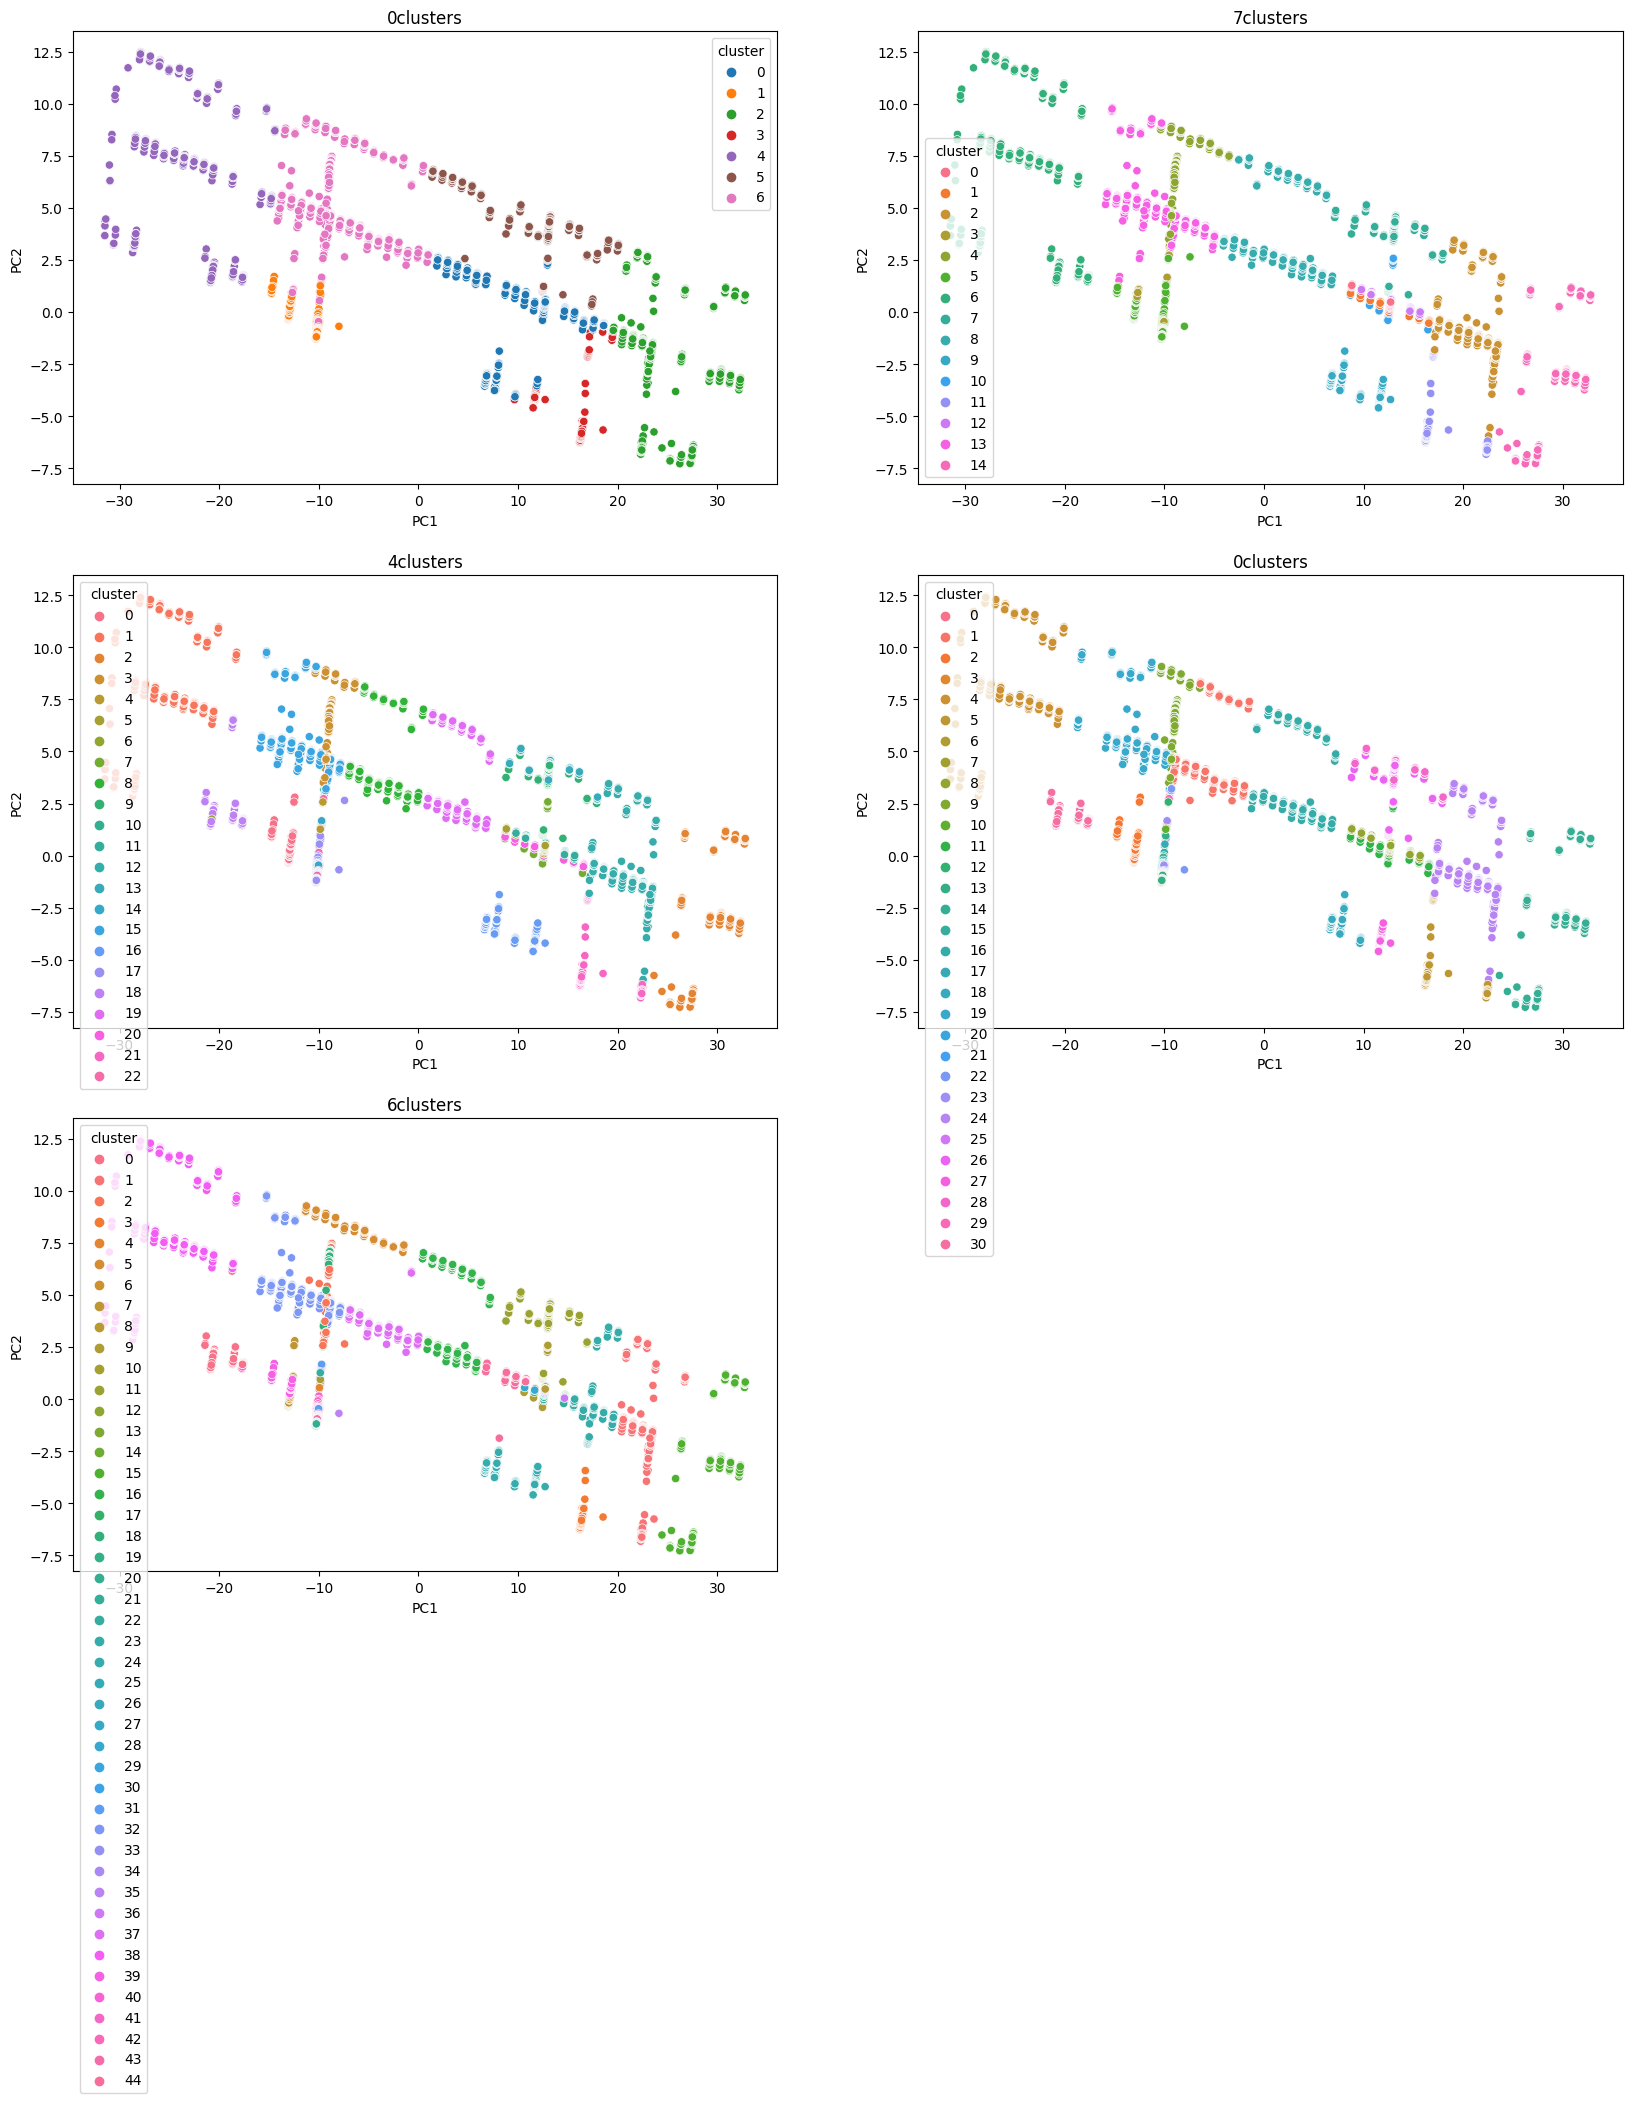

In [ ]:
#@title Visualize Data Using PCA To Reduce Dimensions
from sklearn.decomposition import PCA 
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(data),columns=['PC1','PC2']) 

centroids_to_use=[0,7,4,0,6]
fig=plt.figure(figsize=(20,20))

counter=1
for j in centroids_to_use:
    plt.subplot(3,2,counter)
    plt.title(str(j)+"clusters")
    #Add Labels Resulted from the clustering as new column in PCA_Data
    pca_data['cluster'] = pd.Categorical(labels[counter-1][j])
    sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)
    counter+=1



In [ ]:
print(set(y_train))

{'nmap.', 'loadmodule.', 'back.', 'warezclient.', 'spy.', 'imap.', 'neptune.', 'smurf.', 'rootkit.', 'portsweep.', 'normal.', 'satan.'}


<Axes: title={'center': 'Generated Clusters 7 clusters'}, xlabel='PC1', ylabel='PC2'>

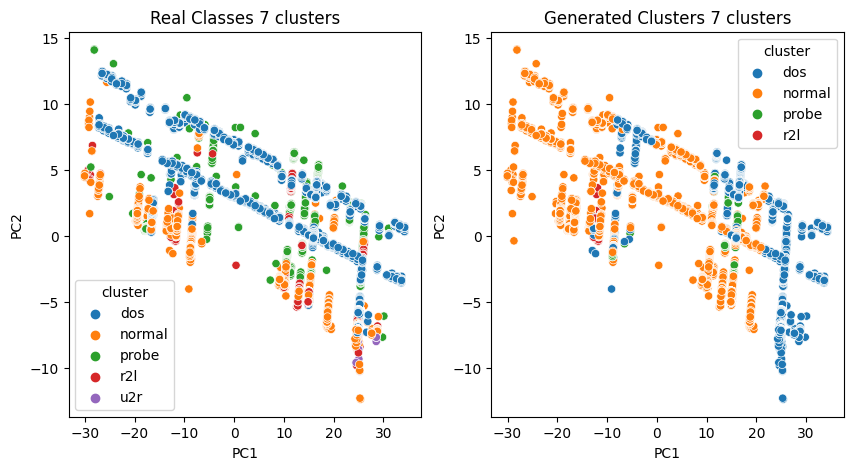

In [ ]:
#@title Visualize Data Using PCA To Reduce Dimensions
from sklearn.decomposition import PCA 
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(test),columns=['PC1','PC2']) 

centroids_to_use=[0,7,4,0,6]
cluster=[7,15,23,31,45]
fig=plt.figure(figsize=(10,5))



plt.subplot(1,2,1)
plt.title("Real Classes 7 clusters")
pca_data['cluster'] = pd.Categorical(y_test5)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)


plt.subplot(1,2,2)
plt.title("Generated Clusters 7 clusters")
pca_data['cluster'] = pd.Categorical(temp)
sns.scatterplot(x="PC1",y="PC2",hue="cluster",data=pca_data)






    #Add Labels Resulted from the clustering as new column in PCA_Data


#Preprocessing  Data For Spectral Clustering and DBSCAN

In [ ]:
#@title Prepare Data
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Anomaly/kddcup.data.gz', header= None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
data.drop([19], axis=1, inplace= True)

data.drop_duplicates(keep='first', inplace= True)

<ipython-input-6-2f865eafc8e6>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sns.heatmap(data.corr(), cmap="YlGnBu",annot=True)


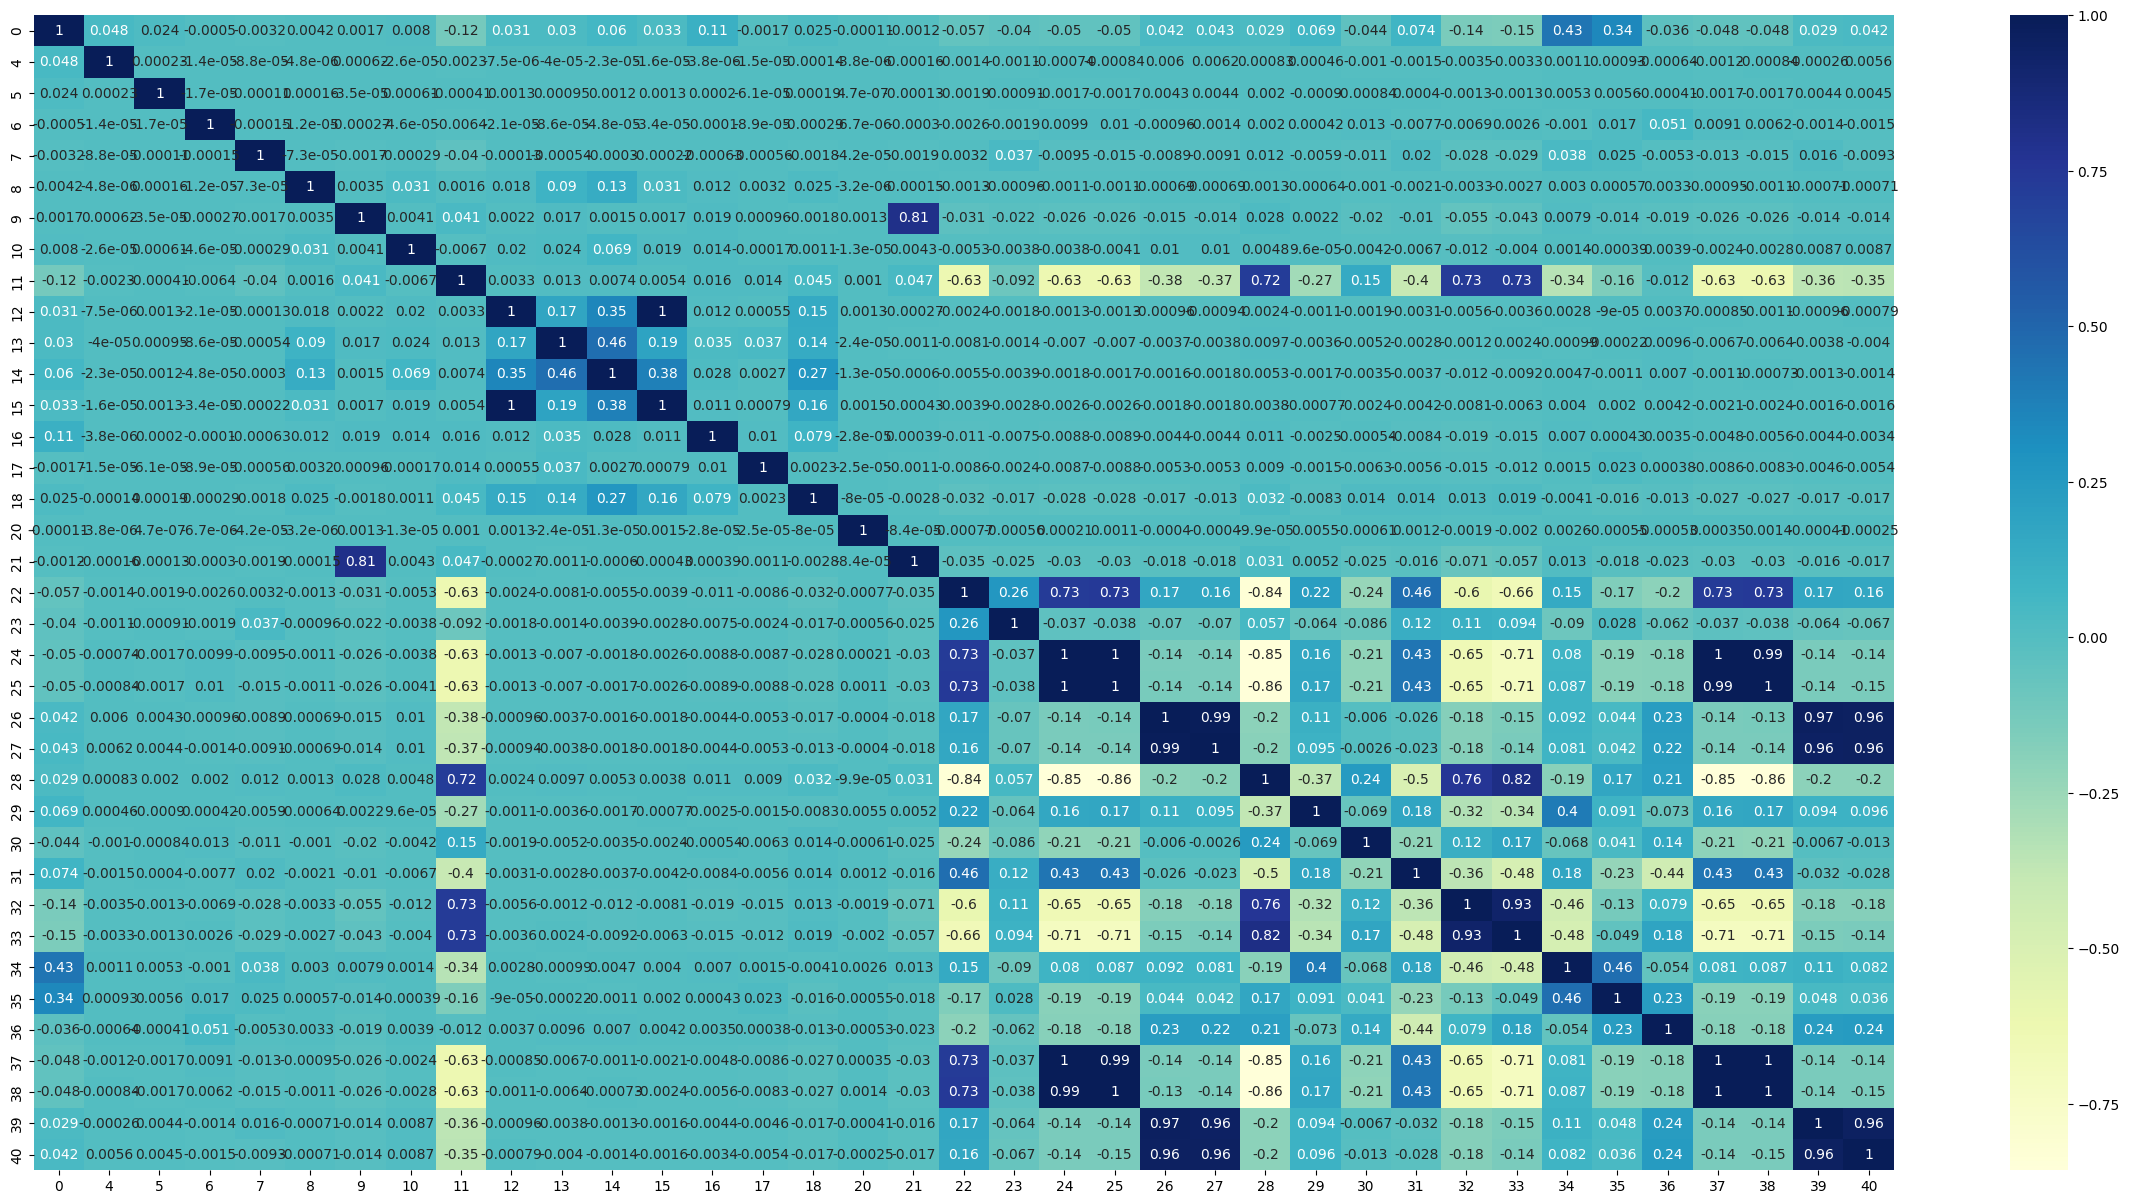

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,15))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu",annot=True)

In [ ]:
data.drop([12,24,25,26,27,32,37,39],axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
categorical_features = data.select_dtypes(include=['object']).columns


#Apply Standard Scaler for numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])



In [ ]:
#@title Studying Outliers

z_scores = data[numerical_features].apply(lambda x: (x - x.mean()) / x.std())

# Find rows where any Z-score is greater than 3 or less than -3
outliers = data[numerical_features][(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]


#Score
print(f'Number of Points :{len(data[0])}')
print(f'Number of outliers: {len(outliers[0])}')


indices=outliers.index
indices=list(indices)
data = data.drop(indices)

Number of Points :1074992
Number of outliers: 224526


In [ ]:
#@title Types of Attacks

#@title Generate New column depending on column 41--> Attack type and the new column is called target to generalize the classifcation
attacks_types = {
'normal.': 'normal',
'back.': 'dos',
'buffer_overflow.': 'u2r',
'ftp_write.': 'r2l',
'guess_passwd.': 'r2l',
'imap.': 'r2l',
'ipsweep.': 'probe',
'land.': 'dos',
'loadmodule.': 'u2r',
'multihop.': 'r2l',
'neptune.': 'dos',
'nmap.': 'probe',
'perl.': 'u2r',
'phf.': 'r2l',
'pod.': 'dos',
'portsweep.': 'probe',
'rootkit.': 'u2r',
'satan.': 'probe',
'smurf.': 'dos',
'spy.': 'r2l',
'teardrop.': 'dos',
'warezclient.': 'r2l',
'warezmaster.': 'r2l',
'snmpgetattack.':'r2l',
'named':'r2l',
'xlock.':'r2l',
'saint.':'probe',
'apache2.':'dos',
'sendmail.':'r2l',
'udpstorm.':'dos',
'xterm.':'u2r',
'mscan.':'probe',
'processtable.':'dos',
 'ps.':'u2r',
 'httptunnel.':'r2l',
 'worm.':'u2r',
 'mailbomb.':'dos',
 'sqlattack.':'u2r',
 'snmpguess.':'u2r',
 'xsnoop.':'r2l'

}



In [ ]:
label_encoder = preprocessing.LabelEncoder()
data[1]= label_encoder.fit_transform(data[1])
data[2]= label_encoder.fit_transform(data[2])
data[3]= label_encoder.fit_transform(data[3])


data['target'] = data[41].map(attacks_types)

y_train5=data['target']
y_train=data[41]
data.drop(['target'], axis= 1, inplace =True )
data.drop([41], axis= 1, inplace =True )

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(data,y_train5,random_state=42,test_size=0.9975,stratify=y_train5)

# Annova

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif, SelectKBest



# Compute the ANOVA F-value and p-value for each feature in the training set
f_values, p_values = f_classif(X_train, Y_train)
# for i, feature_name in enumerate(range(X_train.shape[1])):
#     print(f"Feature {i}: F-value={f_values[i]:.2f}, p-value={p_values[i]:.2f}")
# Select the top 10 features based on their F-values and p-values
k_best = SelectKBest(f_classif, k=7)
X_train_new = k_best.fit_transform(X_train, Y_train)
X_test_new = k_best.transform(X_test)


X_train_new = pd.DataFrame(X_train_new)
X_test_new=pd.DataFrame(X_test_new)

#DBSCAN

# DBSCAN Implementation

In [ ]:
#@title Grow Cluster
import numpy

def grow_cluster(D, labels, P, NeighborPts, C, eps, MinPts):
  '''
  Grow a new cluster with label `C` from the seed point `P`.

  This function searches through the dataset to find all points that belong
  to this new cluster. When this function returns, cluster `C` is complete.

  Parameters:
    `D`      - The dataset (a list of vectors)
    `labels` - List storing the cluster labels for all dataset points
    `P`      - Index of the seed point for this new cluster
    `NeighborPts` - All of the neighbors of `P`
    `C`      - The label for this new cluster.  
    `eps`    - Threshold distance
    `MinPts` - Minimum required number of neighbors
  '''

# Assign the cluster label to the seed point.
  labels[P] = C

  # Look at each neighbor of P (neighbors are referred to as Pn). 
  # NeighborPts will be used as a FIFO queue of points to search--that is, it
  # will grow as we discover new branch points for the cluster. The FIFO
  # behavior is accomplished by using a while-loop rather than a for-loop.
  # In NeighborPts, the points are represented by their index in the original
  # dataset.
  i = 0
  while i < len(NeighborPts):    
      
      # Get the next point from the queue.        
      Pn = NeighborPts[i]
    
      # If Pn was labelled NOISE during the seed search, then we
      # know it's not a branch point (it doesn't have enough neighbors), so
      # make it a leaf point of cluster C and move on.
      if labels[Pn] == -1:
        labels[Pn] = C
      
      # Otherwise, if Pn isn't already claimed, claim it as part of C.
      elif labels[Pn] == 0:
          # Add Pn to cluster C (Assign cluster label C).
          labels[Pn] = C
          
          # Find all the neighbors of Pn
          PnNeighborPts = region_query(D, Pn, eps)
          
          # If Pn has at least MinPts neighbors, it's a branch point!
          # Add all of its neighbors to the FIFO queue to be searched. 
          if len(PnNeighborPts) >= MinPts:
              NeighborPts = NeighborPts + PnNeighborPts
          # If Pn *doesn't* have enough neighbors, then it's a leaf point.
          # Don't queue up it's neighbors as expansion points.
          #else:
              # Do nothing                
              #NeighborPts = NeighborPts               
      
      # Advance to the next point in the FIFO queue.
      i += 1        
  
  # We've finished growing cluster C!




In [ ]:
#@title DBSCAN Run

def dbscan(data, eps, MinPts):
    #data is the dataset to be clustered
    #eps is epislon or radius of circle to be drawn around point  
    #MinPts is minimum points to exist in circle to consider point a core point and every points existing in that circle as 1 cluster
 
   
    #-1 - means a noise point , 0 - Means the point hasn't been considered yet.
    labels = [0]*len(data)

    # C is the ID of the current cluster.    
    C = 0
    
    for P in range(0, len(data)):
      # If the point's label is not 0, continue to the next point.
      if not (labels[P] == 0):
          continue
      # Find all of P's neighboring points.
      NeighborPts = region_query(data, P, eps)
      
      # If the number is below MinPts, this point is noise. 

      if len(NeighborPts) < MinPts:
          labels[P] = -1
      # Otherwise, if there are at least MinPts nearby, use this point as the seed for a new cluster.    
      else: 
          C += 1
          grow_cluster(data, labels, P, NeighborPts, C, eps, MinPts)
  
    return labels

In [ ]:
#@title Get Neigbhours of Point
from scipy.spatial.distance import cdist

#Neighour of point is point that distance between them is less than epislon
def region_query(data,point, eps):
    neighbors = []
    distances = cdist(data.iloc[[point]], data)[0]

    # For each point in the dataset...
    for Pn in range(0, len(data)):        
      # If the distance is below the threshold, add it to the neighbors list.
      if (distances[Pn] < eps and Pn != point):
        neighbors.append(Pn)
    return neighbors


#Hypertune DBSCAN Parameters

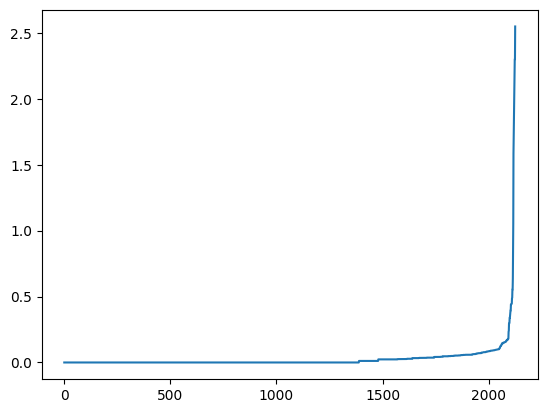

In [ ]:
#@title Hyptertune Get Min points and eps First
from sklearn.neighbors import NearestNeighbors

MinPts=X_train_new.shape[1]+1


neighbors_model = NearestNeighbors(n_neighbors = X_train_new.shape[1])

knn_result = neighbors_model.fit(X_train_new)

dis, indices = knn_result.kneighbors(X_train_new)

dis = np.sort(dis,axis=0)
dis = dis[:,1]


plt.plot(dis)





#Run DBSCAN

In [ ]:
#@title Using MinPts=Features+1 , eps : from knn elbow value

MinPts=8
eps=0.3

dbscan_labels=dbscan(X_train_new,eps,MinPts)


In [ ]:
#@title Checking Unique Values of  Resullted Labels to study well noise values
from collections import Counter

count = Counter(dbscan_labels)
unique_values = list(count.keys())
occurrences = list(count.values())

print("Unique values:", unique_values)
print("Occurrences:", occurrences)

Unique values: [1, 2, -1, 3, 4, 5]
Occurrences: [1485, 466, 52, 70, 12, 41]


<Axes: xlabel='PC1', ylabel='PC2'>

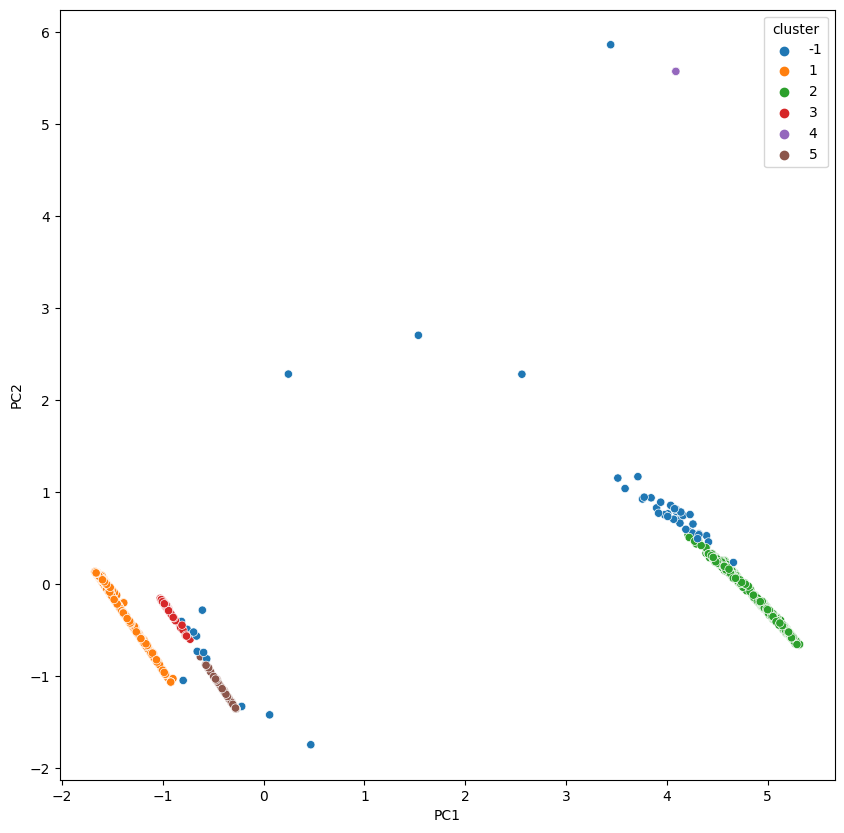

In [ ]:
#@title Visualize Data Using PCA To Reduce Dimensions
from sklearn.decomposition import PCA 
pca = PCA(2) 
pca_data = pd.DataFrame(pca.fit_transform(X_train_new),columns=['PC1','PC2']) 

fig=plt.figure(figsize=(10,10))
pca_data['cluster'] = pd.Categorical(dbscan_labels)




sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data)



In [ ]:
#@title Get The maximum occurence of  labels "5" in the clusters
def map_cluster_to_labels(clustering_labels,y,k):
  if k>23:
    matrix=np.zeros([k,k])
  else:
    matrix=np.zeros([23,23])
    
  map={'normal':1,'u2r':2,'dos':3,'r2l':4,'probe':5}

  df = pd.DataFrame({'y_predicted': clustering_labels, 'y_train': y})
  for i in range(len(np.unique(clustering_labels))):
    temp=df[df['y_predicted']==np.unique(clustering_labels)[i]]
    count=temp.value_counts()
    for key, value in count.items():
        matrix[i][map[key[1]]-1]=value
  return matrix


In [ ]:
#@title Map Cluster Results to Labels of the attacks

#@title Map cluster results to use built in evaluation metrics
def rename_clusters(matrix,clustering_labels):
  names={1:'normal',2:'u2r',3:'dos',4:'r2l',5:'probe'}

  #Get Most Ocurrence label in each cluster
  max_indices = np.argmax(matrix, axis=1)
  max_indices=max_indices+1

  #labels5 --> list of size 5 holding the label most appeard in every cluster
  labels5=[]
  for i in range(len(max_indices)):
    value=names.get(max_indices[i])
    labels5.append(value)
  labels5 = {index: value for index, value in enumerate(labels5)}



  #Replace every cluster number with the most appeard label in this cluster

  temp = np.copy(clustering_labels)
  temp = temp.tolist()

  for i in range(len(temp)):
    temp[i]=labels5.get(clustering_labels[i])

  return temp

In [ ]:
#@title Evluate Train Data Using Built In Functions
from sklearn.metrics import precision_score, recall_score, f1_score

matrix=map_cluster_to_labels(dbscan_labels,Y_train,6)
temp=rename_clusters(matrix,dbscan_labels)

temp = [x if x is not None else "Wrong" for x in temp]



precision = precision_score(Y_train, temp, average='weighted',zero_division=1)
recall = recall_score(Y_train, temp, average='weighted',zero_division=1)
f1score = f1_score(Y_train, temp, average='weighted',zero_division=1)

print(f'Precision:= {100*precision:0.3} %' )
print(f'Recall:= {100*recall:0.3} %' )
print(f'F1score:= {100*f1score:0.3} %' )


Precision:= 99.9 %
Recall:= 97.5 %
F1score:= 98.6 %


# Hierarcial Clustering

In [ ]:
from scipy.spatial import KDTree
def find_nearst_point(samples):

  X = np.array(samples)
  print("omar")
  tree = KDTree(X)
  print("sobhy")


  # Find the nearest neighbor to each point in X
  distances, indices = tree.query(X, k=2)

  # distances and indices are both arrays with shape (4, 2), since we asked for the 2 nearest neighbors
  # The first column of indices is always the index of the point itself, so we can ignore it
  nearest_indices = indices[:, 1]
  nearest_distances = distances[:, 1]
  return nearest_indices



def compute_distance(samples):
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
def distance_calculate(sample1,sample2):
   
  dist = []
  for i in range(len(sample1)):
      for j in range(len(sample2)):
          try:
              dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
          except:
              dist.append(intersampledist(sample1[i],sample2[j]))
  return min(dist)


      # Distance calulated between two samples. The two samples can be both samples, both clusters or
      # one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other 
      # cases, we refer it as an exception case and pass the samples as parameter to some function that 
      # calculates the necessary distance between cluster and a sample


In [ ]:
def intersampledist(s1,s2):
        '''
            To be used in case we have one sample and one cluster . It takes the help of one 
            method 'interclusterdist' to compute the distances between elements of a cluster(which are
            samples) and the actual sample given.
        '''
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
def interclusterdist(self,cl,sample):
    if sample[0]!='<class \'list\'>':
        sample = [sample]
    dist   = []
    for i in range(len(cl)):
        for j in range(len(sample)):
            dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
    return min(dist)
    

In [ ]:
data = data.reset_index(drop=True)
df_transposed = data.T.reset_index()

# transpose the dataframe back
data = df_transposed.T


progression = [[i] for i in range(data.shape[0])]

samples=[]
for i in range(data.shape[0]):
  sample=[]
  for j in range(data.shape[1]):
    sample.append(data.iloc[i, j])
  samples.append(sample)


In [ ]:
m = len(samples)

while m>1:
    print('Sample size before clustering    :- ',m)
    Distance_mat= compute_distance(samples)
    print(Distance_mat)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')